1) Read and explore the given dataset. (Rename column/add headers, plot histograms, find data characteristics)

In [11]:
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/drive.metadata.readonly']

def main():
    """Shows basic usage of the Drive v3 API.
    Prints the names and ids of the first 10 files the user has access to.
    """
    creds = None
    # The file token.pickle stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'client_id.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('drive', 'v3', credentials=creds)

    # Call the Drive v3 API
    results = service.files().list(
        pageSize=10, fields="nextPageToken, files(id, name)").execute()
    items = results.get('files', [])

    if not items:
        print('No files found.')
    else:
        print('Files:')
        for item in items:
            print(u'{0} ({1})'.format(item['name'], item['id']))

if __name__ == '__main__':
    main()

Files:
recommendation.ipynb (1-yeXwd0WfFC8giTeO3Bnu9lWxrOO6MPt)
Untitled0.ipynb (1ph6NHNz0iBpHsKzmq8Sys5gpbsrPT8U3)
Untitled (1gaaLlGqHiRGKG3jWtUzaCQMwV6GsPi3W)
Colab Notebooks (1-us1FwjsahuZt-fJIxaRxuIqre1jPW6Y)
Mrinalini_Resume.docx (1_Nlnbn1yE_OpSp6T4J-6rYGm-Z9j_WNf)
Mrinalini_Resume.docx (1uDQlMAfw-HNeHmxvX8GOWyxG1eAbRVf4)
Mrinalini_Resume.docx (135ZE0FZL0nKp-ddyS22gdECXLitrRghl)
Mrinalini_Resume.docx (172ZZiSfoRp5CrQREpvLcvsRB_qbBmvfw)
Mrinalini_Resume.docx (1z892Tl-BMMwIlGSvfCzLgCVX-Od6rMUD)
Mrinalini_Resume.docx (1EIw8a2pPNYF-Z6x3Scg2Ov4m7bE_iTTi)


In [ ]:
from apiclient import discovery
from httplib2 import Http
import oauth2client
from oauth2client import file, client, tools
obj = lambda: None
lmao = {"auth_host_name":'localhost', 'noauth_local_webserver':'store_true', 'auth_host_port':[8080, 8090], 'logging_level':'ERROR'}
for k, v in lmao.items():
    setattr(obj, k, v)
    
# authorization boilerplate code
SCOPES = 'https://www.googleapis.com/auth/drive.readonly'
store = file.Storage('token.json')
creds = store.get()
# The following will give you a link if token.json does not exist, the link allows the user to give this app permission
if not creds or creds.invalid:
    flow = client.flow_from_clientsecrets('client_id.json', SCOPES)
    creds = tools.run_flow(flow, store, obj)

In [ ]:
#https://drive.google.com/open?id=1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW

In [ ]:
import io
from googleapiclient.http import MediaIoBaseDownload
DRIVE = discovery.build('drive', 'v3', http=creds.authorize(Http()))
file_id = '1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW'
request = DRIVE.files().get_media(fileId=file_id)
fh = io.FileIO('ratings_Electronics.csv', mode='w')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))

In [37]:
import os
import numpy as np  
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [21]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv("ratings_Electronics.csv", header=None)
df.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [22]:
df.shape

(7824482, 4)

In [23]:
df.columns = ['userId', 'productId', 'rating', 'timestamp']

In [24]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [25]:
df.shape

(7824482, 4)

In [26]:
df.isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000159DD219208>,
      dtype=object)

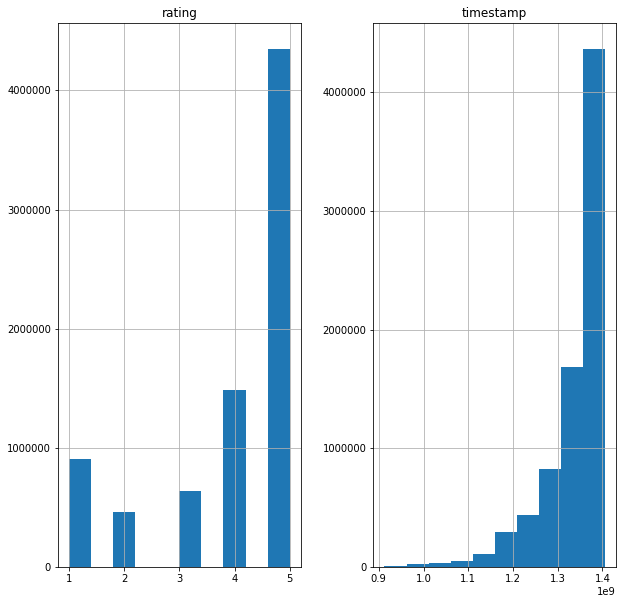

In [27]:
df.hist(figsize=(10,10))

2) Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings

In [63]:
conda install -c conda-forge/label/cf201901 scikit-surprise

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.07=py37_0
  - defaults/win-64::numba==0.44.1=py37hf9181ef_0
done

## Package Plan ##

  environment location: C:\Users\Mrinalini\anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py37_0           6 KB
    anaconda-custom            |           py37_1           3 KB
    ca-certificates-2018.11.29 |       ha4d7672_0         179 KB  conda-forge/label/cf201901
    certifi-2018.11.29         |        py37_1000         144 KB  conda-forge/label/cf201901
    tbb-2018_20171205          |           vc14_0         718 KB  conda-forge/label/cf201901
    ------------------------------------------------------

In [66]:
from surprise.model_selection import train_test_split

In [68]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy

In [71]:
trainset, testset = train_test_split(data, test_size=.15)

User based collaborative filtering

In [72]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [77]:
uid = str(500)  # raw user id
iid = str(500)  # raw item id

In [78]:
# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: 500        item: 500        r_ui = None   est = 3.64   {'actual_k': 5, 'was_impossible': False}


In [79]:
test_pred = algo.test(testset)

In [80]:
test_pred

[Prediction(uid='305', iid='143', r_ui=3.0, est=3.6232061388112444, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='6', iid='536', r_ui=4.0, est=2.835910973760305, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='166', iid='751', r_ui=4.0, est=3.514840495199653, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='277', iid='24', r_ui=4.0, est=3.494998091167275, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='191', iid='272', r_ui=4.0, est=4.347354668514635, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='788', iid='132', r_ui=5.0, est=4.0090360755380425, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='551', iid='846', r_ui=3.0, est=3.656569025263331, details={'actual_k': 18, 'was_impossible': False}),
 Prediction(uid='606', iid='827', r_ui=3.0, est=3.311830021894022, details={'actual_k': 24, 'was_impossible': False}),
 Prediction(uid='394', iid='763', r_ui=3.0, est=3.

In [81]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 0.9308


0.9307537435423727

Item based collaborative filtering

In [82]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [83]:
test_pred = algo.test(testset)

In [84]:
test_pred

[Prediction(uid='305', iid='143', r_ui=3.0, est=3.2729708902492485, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='6', iid='536', r_ui=4.0, est=2.8860133935751655, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='166', iid='751', r_ui=4.0, est=3.487251615354366, details={'actual_k': 11, 'was_impossible': False}),
 Prediction(uid='277', iid='24', r_ui=4.0, est=3.4698130011248796, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid='191', iid='272', r_ui=4.0, est=4.165920325707343, details={'actual_k': 15, 'was_impossible': False}),
 Prediction(uid='788', iid='132', r_ui=5.0, est=3.8878984444091143, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='551', iid='846', r_ui=3.0, est=3.6643693394170618, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='606', iid='827', r_ui=3.0, est=3.1648782144219774, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='394', iid='763', r_ui=3.0, e

In [85]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.9129


0.912929603804779

Popularity based

In [86]:
df.groupby('userId')['rating'].mean().head()  

userId
A00000262KYZUE4J55XGL    5.0
A000063614T1OE0BUSKUT    5.0
A00009182QVLSWIGHLS1B    5.0
A00009661LC9LQPGKJ24G    5.0
A00010809P09NUU6ZP6H     5.0
Name: rating, dtype: float64

In [87]:
df.groupby('userId')['rating'].count().sort_values(ascending=False).head()  

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: rating, dtype: int64

In [88]:
ratings_mean_count = pd.DataFrame(df.groupby('userId')['rating'].mean()) 

In [89]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('userId')['rating'].count())  

In [90]:
ratings_mean_count.head()  

,rating,rating_counts
userId,,
A00000262KYZUE4J55XGL,5.0,1
A000063614T1OE0BUSKUT,5.0,2
A00009182QVLSWIGHLS1B,5.0,1
A00009661LC9LQPGKJ24G,5.0,1
A00010809P09NUU6ZP6H,5.0,1
